# Program 4.07: Compare the proportion of cells in state B with its initial proportion using cell-cell signalling, over several realizations

This program was developed for the master's thesis “Agent-based modelling of embryonic organoid development” (Víctor Villegas-Morral, 2024) using [CellBasedModels.jl](https://github.com/dsb-lab/CellBasedModels.jl).

The report and the rest of the code can be found on the [Multiscale Physics of Living Systems Group’s GitHub](https://github.com/MPoLS-lab) and on [my personal GitHub](https://github.com/villegas-morral/masters-thesis).

## Preamble

In [ ]:
using NBInclude

In [ ]:
@nbinclude("preamble/packages.ipynb");

In [ ]:
@nbinclude("preamble/model.ipynb");

In [ ]:
@nbinclude("preamble/functions.ipynb");

## Initialization

In [ ]:
parameters = define_par();
dt = 0.002;
save_each = round(Int64, 0.2 / dt);

Random.seed!(3214)
n_cells = 300;

In [ ]:
tf = 30
n_bs = 5
bs = range(start = 0, length = n_bs, stop = 1);
# bs = [0.2,0.6]
# n_bs = length(bs);

## Formation of the aggregate

In [ ]:
com = initialize_growth(parameters; dt=dt);
grow_size!(com, save_each, n_cells)
m0 = length(com);

In [ ]:
println(formed_correctly(com));
# plot_aggregate(com, color_map, 1, m0)

In [ ]:
growncom = deepcopy(com);

## Nonlinear differentiation kinetics: cell-cell signalling (fp = 0)

In [ ]:
com_aux = deepcopy(growncom)
prot = false;

### Loop

In [ ]:
Random.seed!(1234)
seeds = rand(1:2000, n_bs)
props = [Dict() for j in 1:n_bs];

In [ ]:
for ib in 1:n_bs
    seed = seeds[ib]
    print("Seed $ib/$n_bs = $seed... ")
    global com = deepcopy(com_aux)
    com.b = bs[ib]                

    initialize_diff!(com)
    global m1 = length(com)
    differentiate!(com, save_each, tf, prot = prot)
    println(formed_correctly(com))
    global m2 = length(com)

    props[ib] = get_props(com)
    # plot_aggregate(com, color_map, m1, m2)
end

### Average proportion of cells in state B depending on its initial proportion

In [ ]:
dimensionalize_com!(com)

#### Simulation

In [ ]:
bprops = [props[ib][2] for ib in 1:n_bs];

In [ ]:
moments = round.(Int, range(start = m1, length = 5, stop = m2));
# m_24 = minimum([m for m in m1:m2 if com[m].t>23.9])
# m_48 = minimum([m for m in m1:m2 if com[m].t>47.9])
# moments = [m1, m_24, m_48, m2]

times = [com[moment].t for moment in moments];

#### Comparison with the solutions

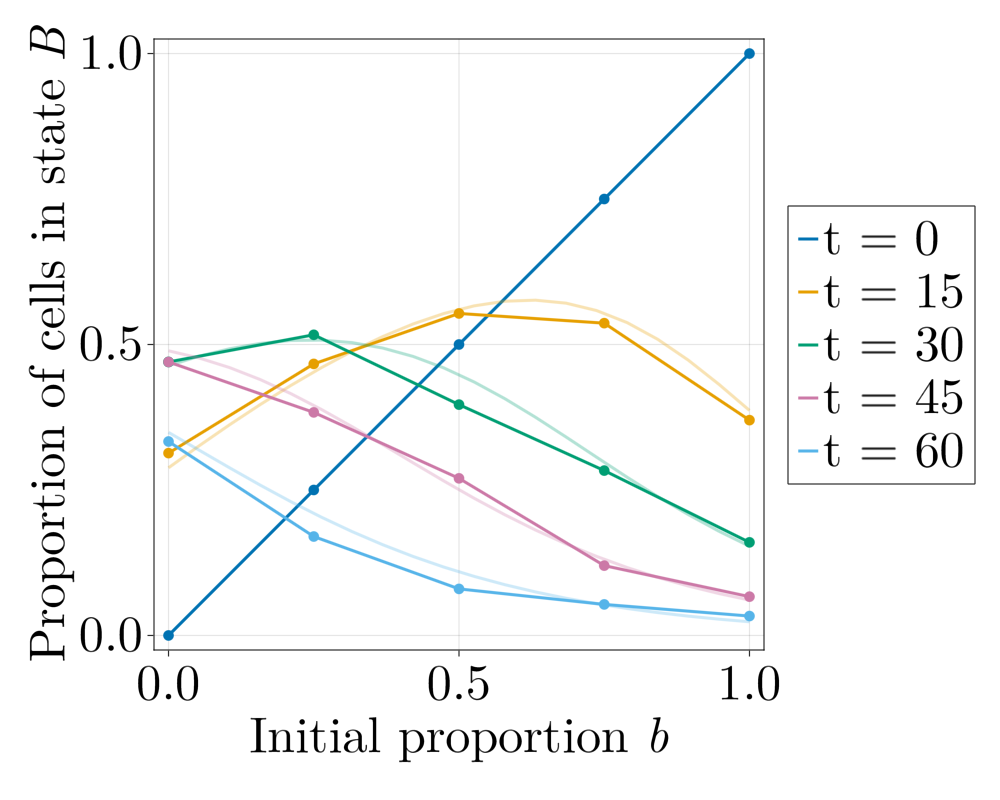

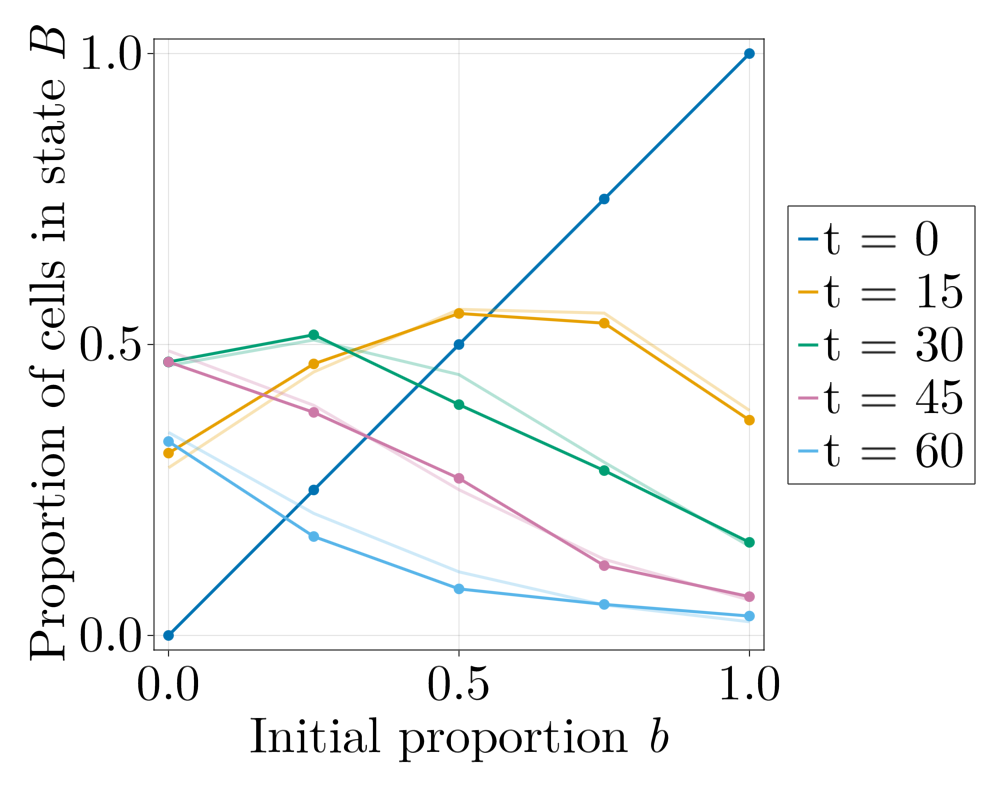

GLMakie.Screen(...)

In [17]:
phib_vs_b(com, m1, m2, bprops, times, bs; compare = true)
phib_vs_b(com, m1, m2, bprops, times, bs, compare = true, compare_nbs=n_bs)

## Nonlinear differentiation kinetics: cell-cell signalling (fp = 10)

In [ ]:
com_aux = deepcopy(growncom)
prot = true;

### Loop

In [ ]:
Random.seed!(1234)
seeds = rand(1:2000, n_bs)
props_fp10 = [Dict() for j in 1:n_bs];

In [ ]:
for ib in 1:n_bs
    seed = seeds[ib]
    print("Seed $ib/$n_bs = $seed... ")
    global com = deepcopy(com_aux)
    com.b = bs[ib]                

    initialize_diff!(com)
    global m1 = length(com)
    differentiate!(com, save_each, tf, prot = prot)
    println(formed_correctly(com))
    global m2 = length(com)

    props_fp10[ib] = get_props(com)
    # plot_aggregate(com, color_map, m1, m2)
end

### Average proportion of cells in state B depending on its initial proportion

In [ ]:
dimensionalize_com!(com)

#### Simulation

In [ ]:
bprops_fp10 = [props_fp10[ib][2] for ib in 1:n_bs];

In [ ]:
moments = round.(Int, range(start = m1, length = 5, stop = m2));
times = [com[moment].t for moment in moments];

#### Comparison with the solutions

In [ ]:
phib_vs_b(com, m1, m2, bprops_fp10, times, bs; compare = true, k=parameters[:k])
phib_vs_b(com, m1, m2, bprops_fp10, times, bs, compare=true, compare_nbs=n_bs)

## Nonlinear differentiation kinetics: cell-cell signalling (fp = 50)

In [ ]:
com_aux = deepcopy(growncom)
prot = true;
# setfield!(com,:dt, 0.0005);

### Loop

In [ ]:
Random.seed!(1234)
seeds = rand(1:2000, n_bs)
props_old = [Dict() for j in 1:n_bs];

In [ ]:
for ib in 1:n_bs
    seed = seeds[ib]
    print("Seed $ib/$n_bs = $seed... ")
    global com = deepcopy(com_aux)
    com.b = bs[ib]                

    initialize_diff!(com)
    global m1 = length(com)
    differentiate!(com, save_each, tf, prot = prot, fp = 50, kp_on = 2, kp_off = 0.5)
    println(formed_correctly(com))
    global m2 = length(com)

    props_old[ib] = get_props(com)
    # plot_aggregate(com, color_map, m1, m2)
end

### Average proportion of cells in state B depending on its initial proportion

In [ ]:
dimensionalize_com!(com)

#### Simulation

In [ ]:
bprops_old = [props_old[ib][2] for ib in 1:n_bs];

In [ ]:
moments = round.(Int, range(start = m1, length = 5, stop = m2));
times = [com[moment].t for moment in moments];

#### Comparison with the solutions

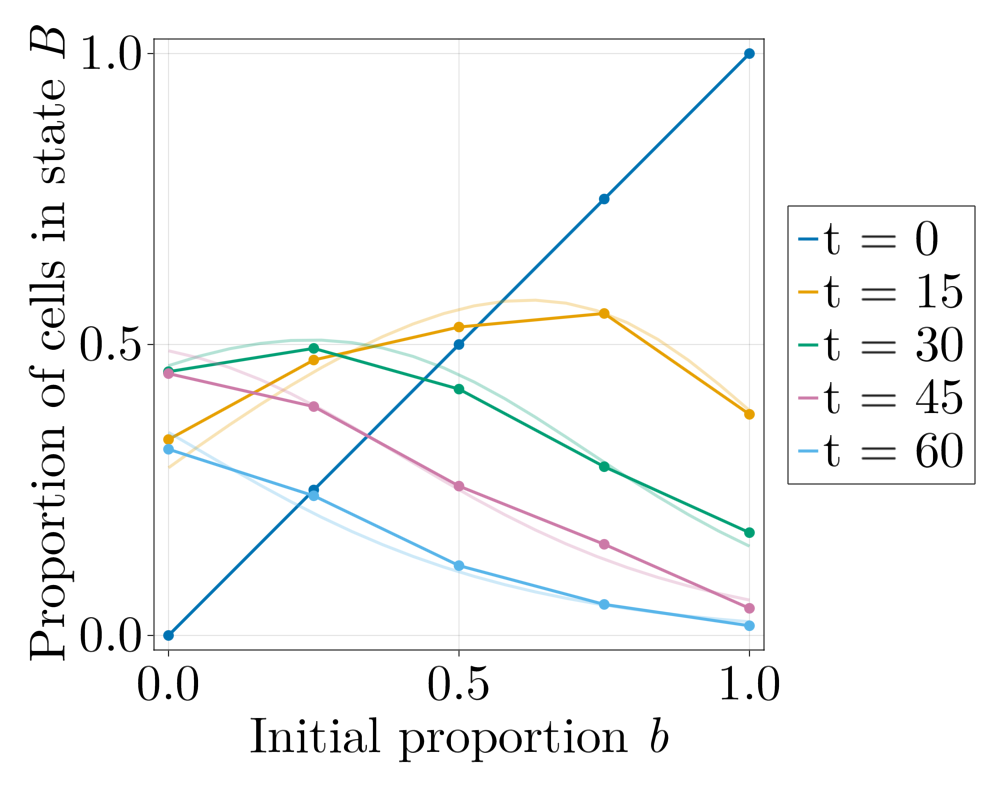

GLMakie.Screen(...)

In [17]:
phib_vs_b(com, m1, m2, bprops_old, times, bs; compare = true, k=parameters[:k])
# phib_vs_b(com, m1, m2, bprops_old, times, bs, compare=true, compare_nbs=n_bs)

## Solutions

### Proportion of cells in state B in terms of b

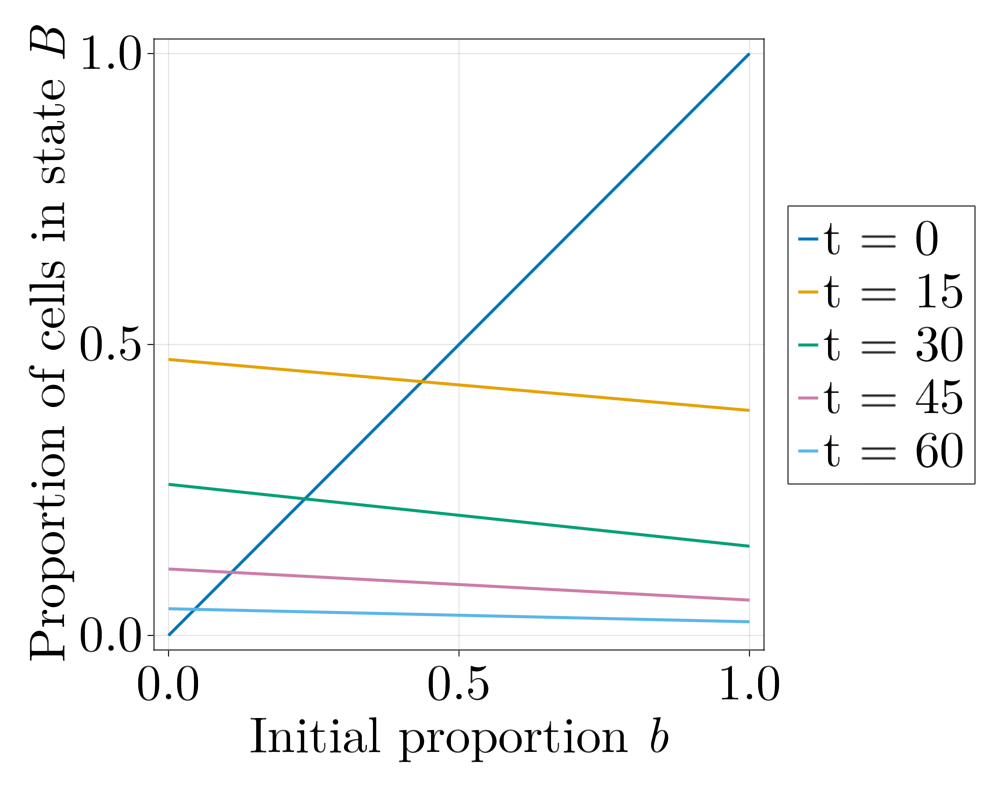

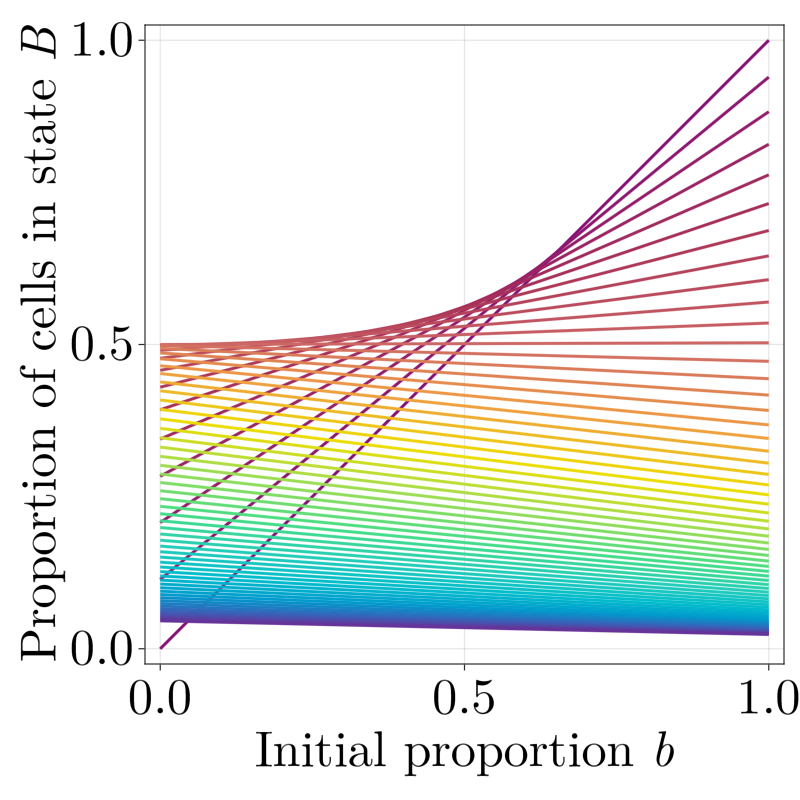

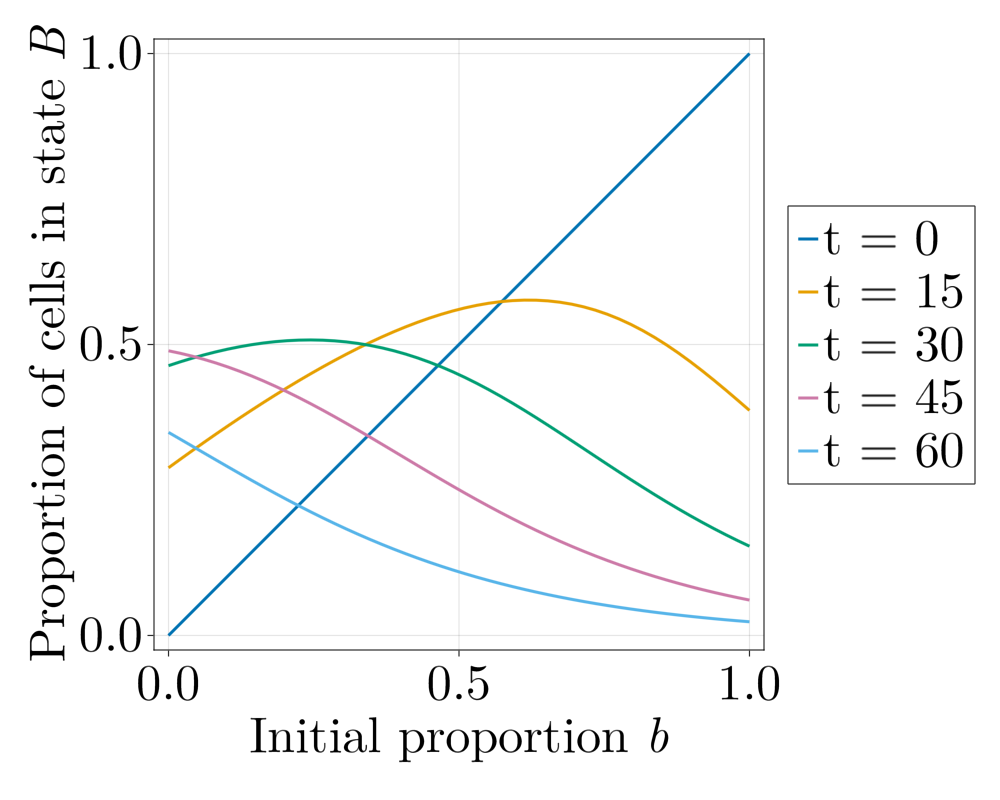

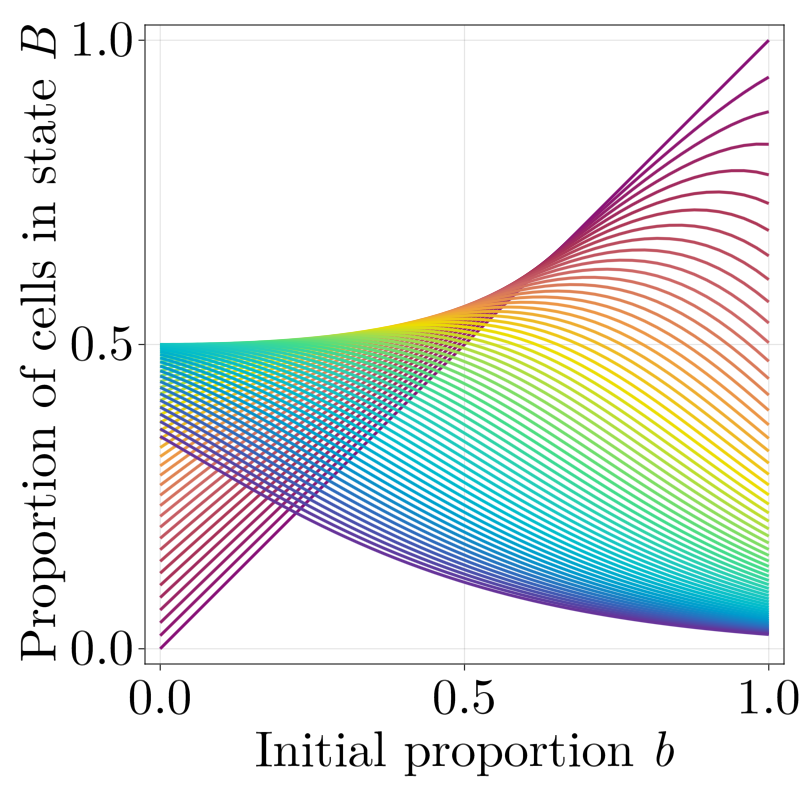

GLMakie.Screen(...)

In [40]:
phib_vs_b_solution(com, m1, m2, times, 0)
phib_vs_b_solution_cool(com, tf, 0, step = 1, k=parameters[:k])
phib_vs_b_solution(com, m1, m2, times, 1, n_bs = 50, k=parameters[:k])
phib_vs_b_solution_cool(com, tf, 1, step = 1, k=parameters[:k])
# phib_vs_b_solution(com, m1, m2, times, 1, k=parameters[:k], n_bs=5)

### Proportion of cells in state A in terms of b

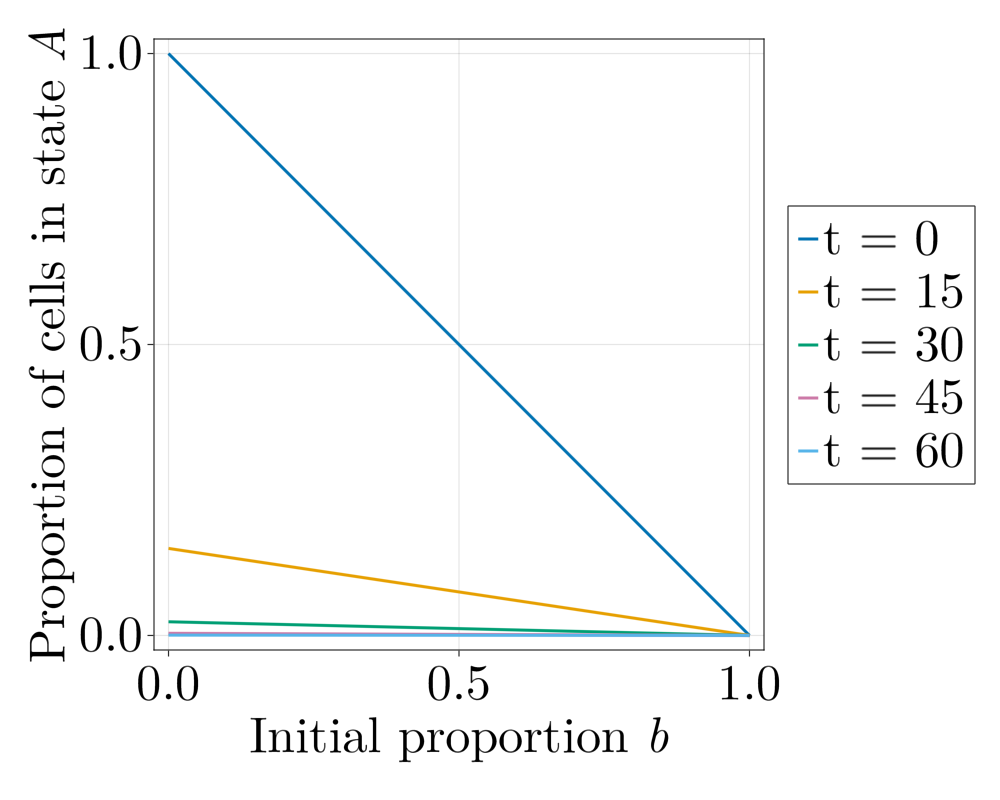

Average proportion of cells in state A depending on b


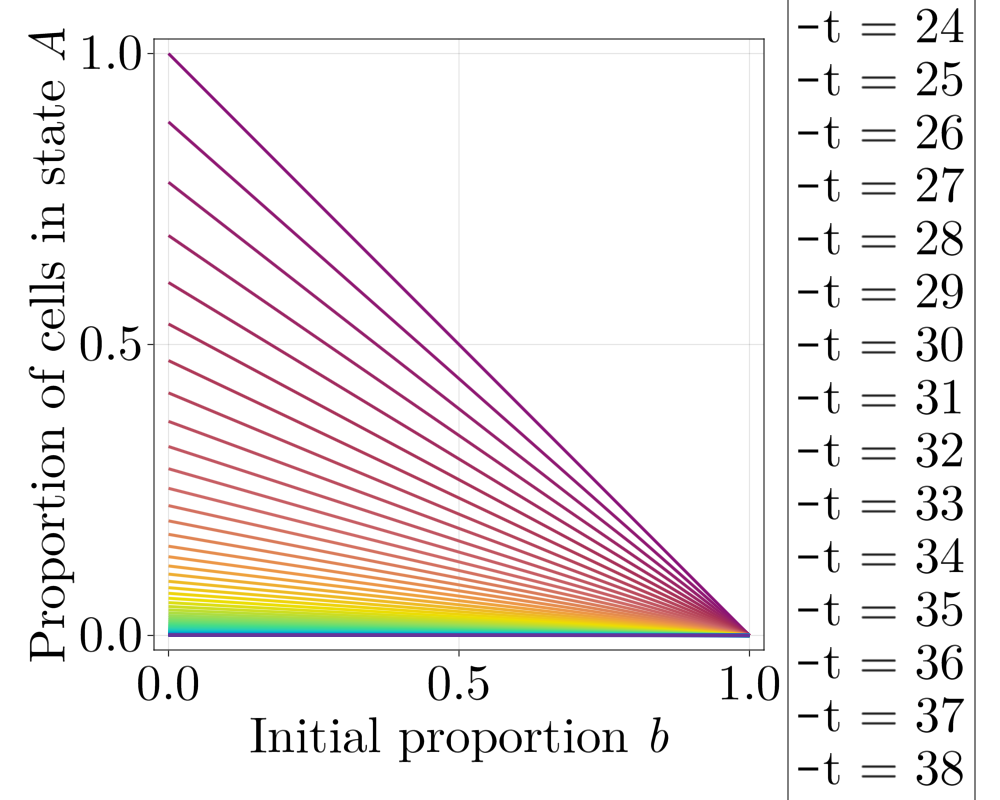

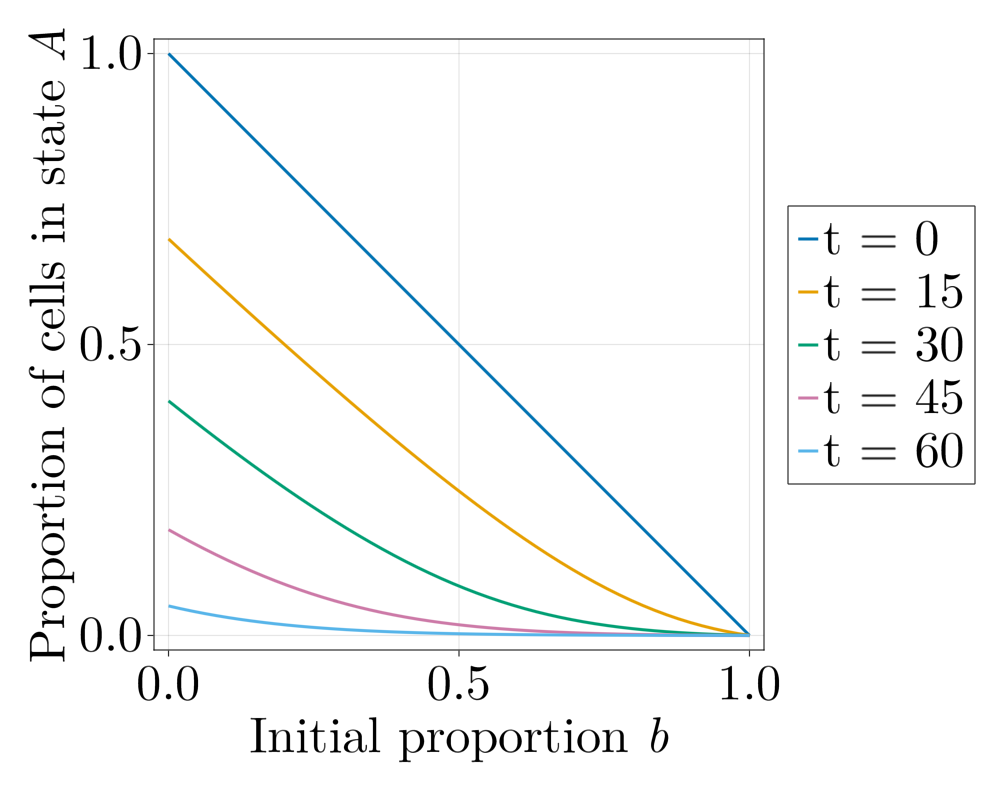

Average proportion of cells in state A depending on b


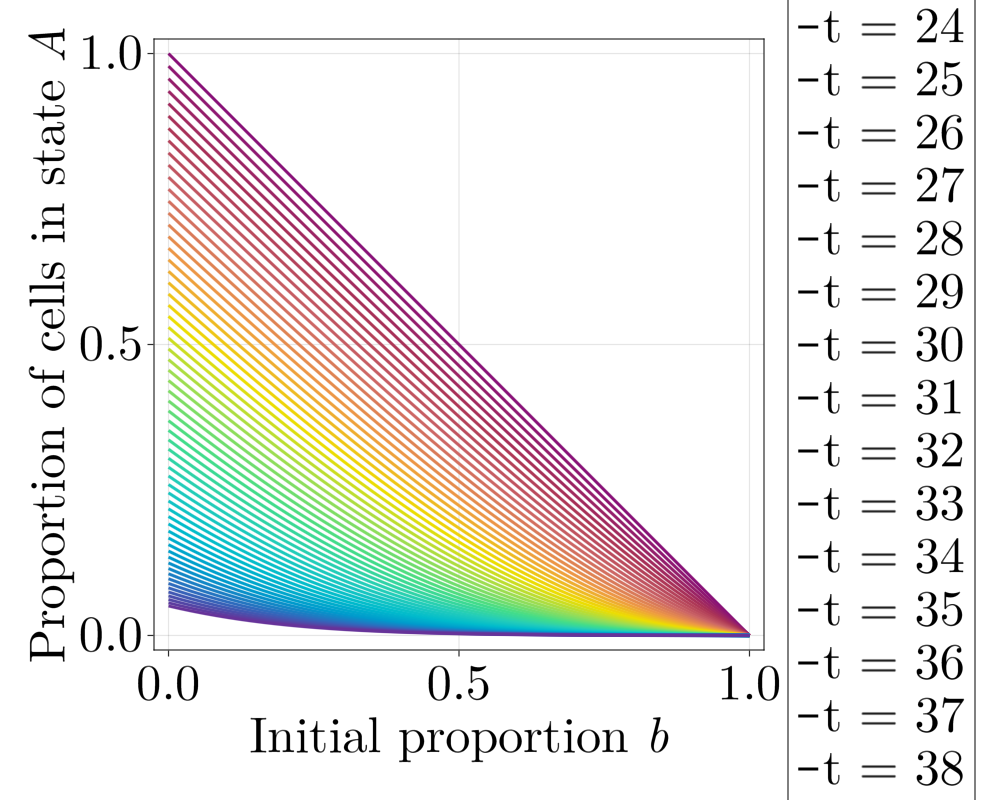

GLMakie.Screen(...)

In [28]:
phix_vs_b_solution(com, m1, m2, times, 0, x = 1)
phix_vs_b_solution_cool(com, tf, 0, step = 1, k=parameters[:k], x = 1, showlegend = true)
phix_vs_b_solution(com, m1, m2, times, 1, n_bs = 50, k=parameters[:k], x = 1)
phix_vs_b_solution_cool(com, tf, 1, step = 1, k=parameters[:k], x = 1, showlegend = true)

### Proportion of cells in state C in terms of b

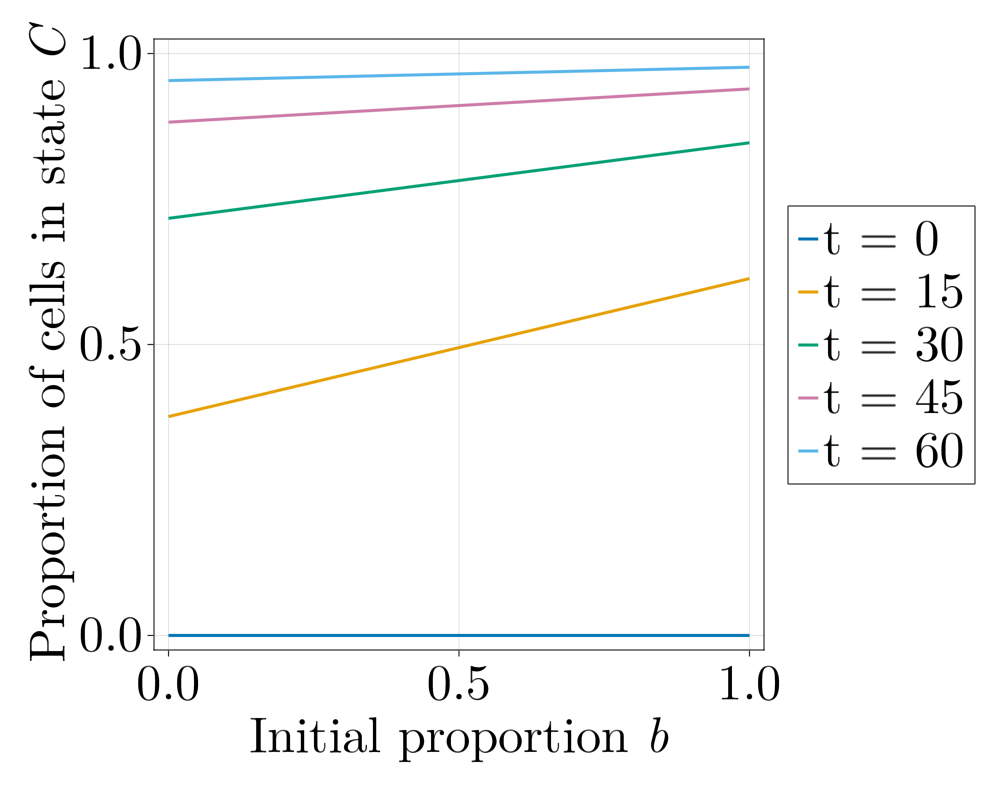

Average proportion of cells in state C depending on b


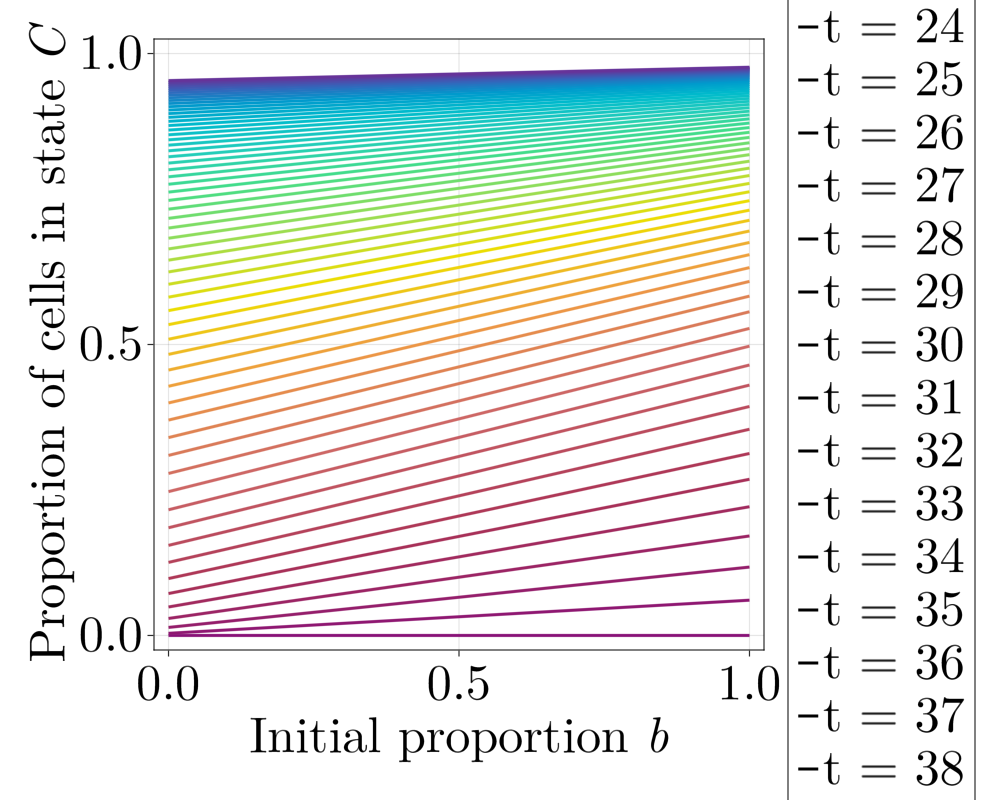

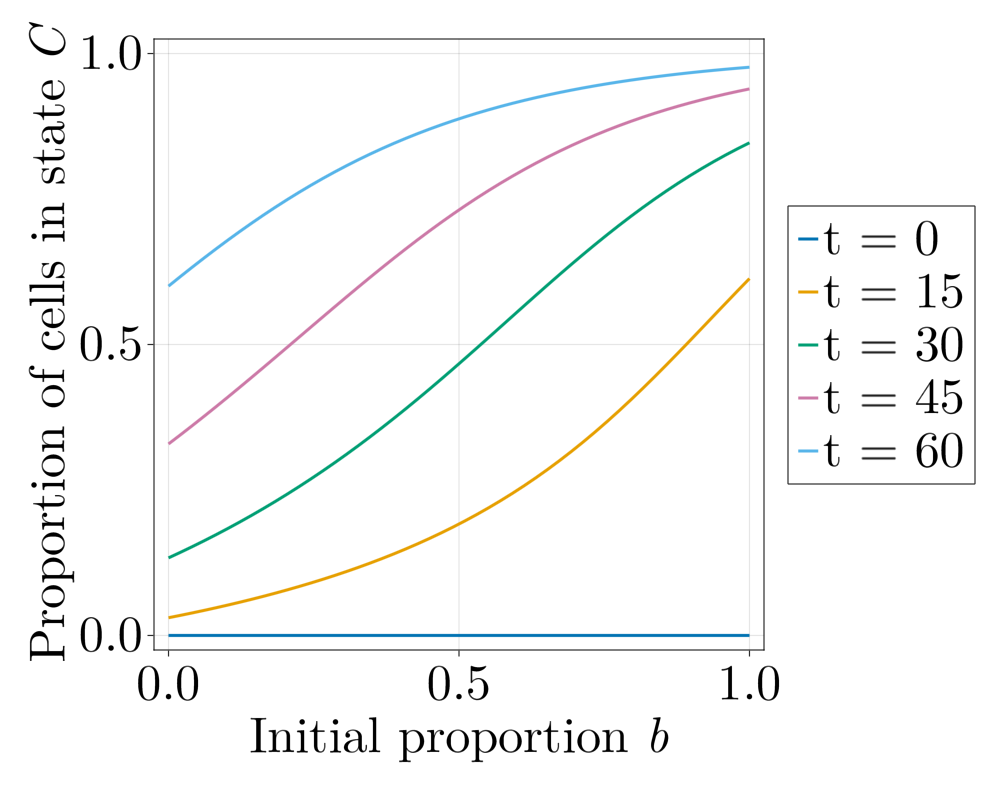

Average proportion of cells in state C depending on b


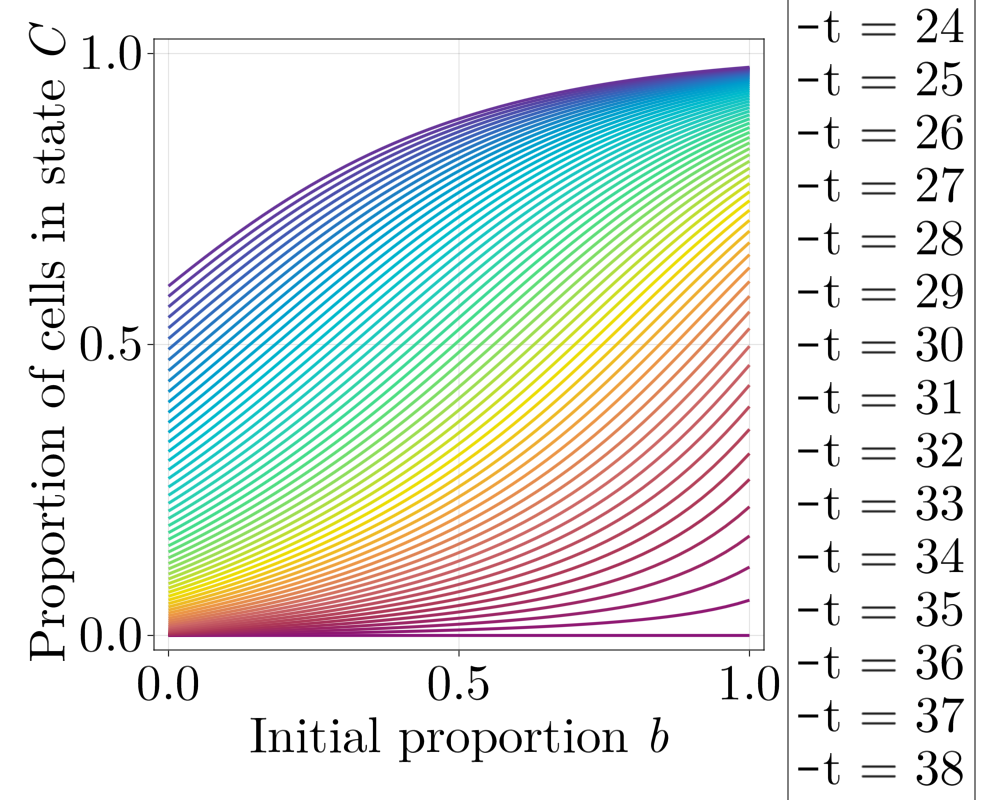

GLMakie.Screen(...)

In [27]:
phix_vs_b_solution(com, m1, m2, times, 0, x = 3)
phix_vs_b_solution_cool(com, tf, 0, step = 1, k=parameters[:k], x = 3, showlegend = true)
phix_vs_b_solution(com, m1, m2, times, 1, n_bs = 50, k=parameters[:k], x = 3)
phix_vs_b_solution_cool(com, tf, 1, step = 1, k=parameters[:k], x = 3, showlegend = true)